In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing>=2.2.1 in c:\users\admin\anaconda3\envs\imdb_score\lib\site-packages (from matplotlib>=2.2->seaborn) (3.0.4)



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
#Summary for the numerical columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [8]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
df.drop_duplicates(inplace = True)
df.shape

(4998, 28)

In [10]:
# We can remove the null values from the dataset where the count is less . so that we don't loose much data 
df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_2_name','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','plot_keywords'],inplace=True)

In [11]:
df.shape

(4695, 28)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4695 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4687 non-null   object 
 1   director_name              4695 non-null   object 
 2   num_critic_for_reviews     4695 non-null   float64
 3   duration                   4695 non-null   float64
 4   director_facebook_likes    4695 non-null   float64
 5   actor_3_facebook_likes     4695 non-null   float64
 6   actor_2_name               4695 non-null   object 
 7   actor_1_facebook_likes     4695 non-null   float64
 8   gross                      4058 non-null   float64
 9   genres                     4695 non-null   object 
 10  actor_1_name               4695 non-null   object 
 11  movie_title                4695 non-null   object 
 12  num_voted_users            4695 non-null   int64  
 13  cast_total_facebook_likes  4695 non-null   int64

#Handling Missing values in the dataset


In [13]:
#Replacing the content rating with Value R as it has highest frequency

df["color"].fillna(df["color"].mode().iloc[0], inplace = True) 

In [14]:
#Replacing the content rating with Value R as it has highest frequency

df["content_rating"].fillna(df["content_rating"].mode().iloc[0], inplace = True) 

In [15]:
#Replacing the aspect_ratio with the median of the value as the graph is right skewed 

df["aspect_ratio"].fillna(df["aspect_ratio"].median(),inplace=True)

In [16]:
#We need to replace the value in budget with the median of the value
df["budget"].fillna(df["budget"].median(),inplace=True)

In [17]:
# We need to replace the value in gross with the median of the value 

df["gross"].fillna(df["gross"].median(),inplace=True)

In [18]:
# We can remove the null values from the dataset where the count is less . so that we don't loose much data 
df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_2_name','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','plot_keywords'],inplace=True)

In [19]:
# Recheck that all the null values are removed

df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [20]:
df.shape

(4695, 28)

In [21]:
df.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'TV-14', 'Not Rated', 'Unrated',
       'Approved', 'NC-17', 'X', 'GP', 'Passed', 'M', 'TV-G', 'TV-PG'],
      dtype=object)

Categorical and numerical columns in the dataset

In [22]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

In [23]:
categorical_cols, numerical_cols

(['color',
  'director_name',
  'actor_2_name',
  'genres',
  'actor_1_name',
  'movie_title',
  'actor_3_name',
  'plot_keywords',
  'movie_imdb_link',
  'language',
  'country',
  'content_rating'],
 ['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'])

<AxesSubplot:>

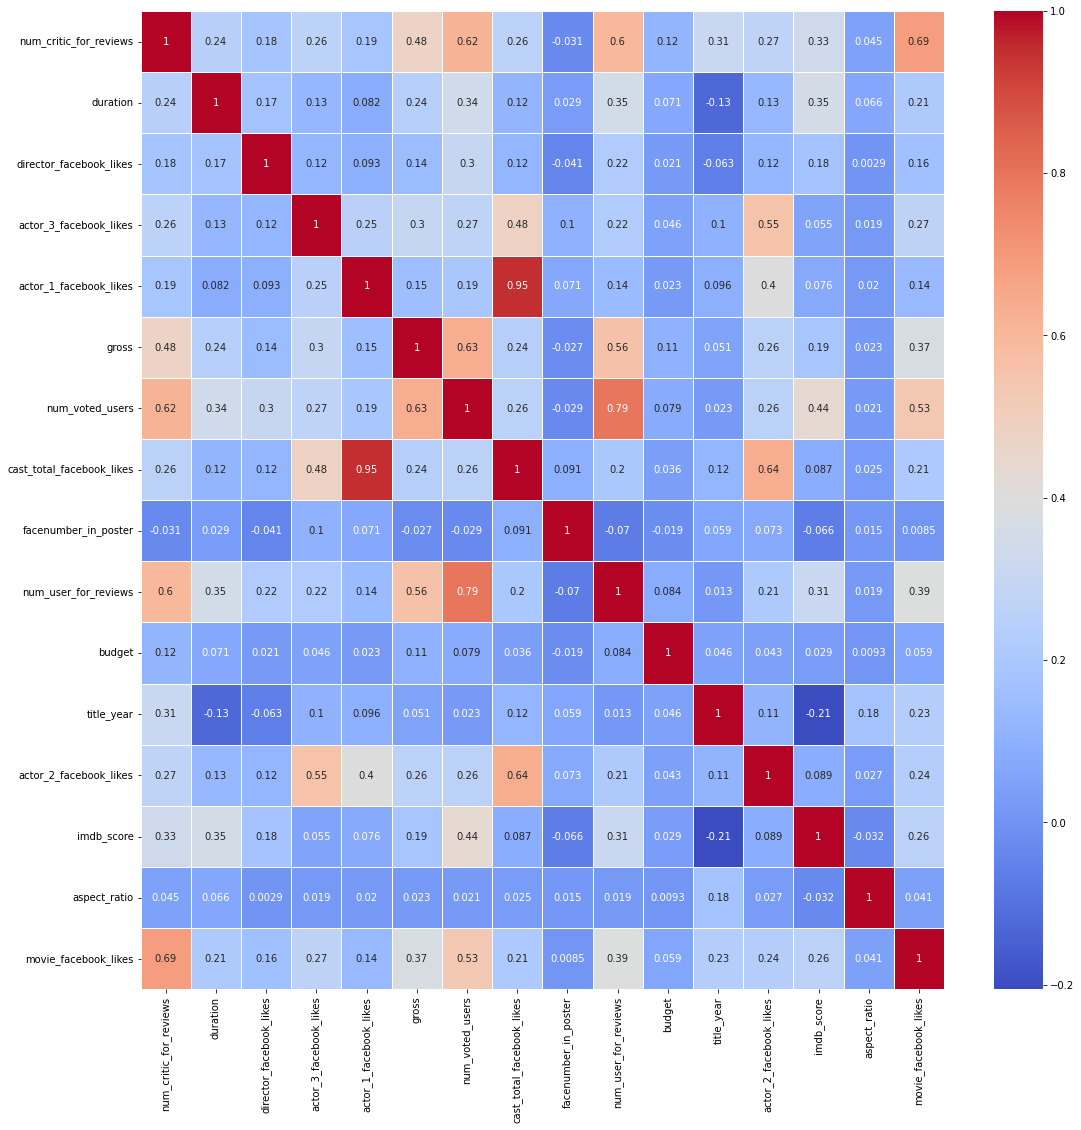

In [24]:
#Plotting the Correlation between the numerical values of the Dataset
_, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), linewidths=.6, cmap='coolwarm', annot=True, ax=ax)

In [25]:
#Making a new column named cast$crew total facebook likes by adding columns director_facebook_likes,actor_3_facebook_likes,actor_2_facebook_likes,cast_total_facebook_likes
df['cast$crew_total_facebook_likes']=df['director_facebook_likes']+df['actor_3_facebook_likes']+df['actor_2_facebook_likes']+df['cast_total_facebook_likes']
df.head(2) 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cast$crew_total_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,6625.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,54913.0


In [26]:
df.drop(columns=['director_facebook_likes','actor_3_facebook_likes','cast_total_facebook_likes','actor_2_facebook_likes'],axis=1,inplace=True)
df.head(2)
    

,color,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,cast$crew_total_facebook_likes
0,Color,James Cameron,723.0,178.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000,6625.0
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35,0,54913.0


In [27]:
df['director_name'].value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
John Cromwell        1
Stewart Hendler      1
Benedek Fliegauf     1
John Stainton        1
Scott Smith          1
Name: director_name, Length: 2240, dtype: int64

In [28]:
#Removing the director name column

df.drop('director_name', axis=1, inplace=True)

In [29]:
#Removing the actor1 ,actor 2 and actor 3 names 

df.drop('actor_1_name',axis=1,inplace=True)

In [30]:
df.drop('actor_2_name',axis=1,inplace=True)

In [31]:
df.drop('actor_3_name',axis=1,inplace=True)

In [32]:
#Dropping the movie title 

df.drop('movie_title',axis=1,inplace=True)

In [33]:
# Dropping the plot keywords
df.drop('plot_keywords',axis=1,inplace=True)

In [34]:
#Dropping the imdb link as is it is unique value
df.drop('movie_imdb_link',axis=1,inplace=True)

In [35]:
#Dropping column country as most of the movies are in color
df.drop('country',axis=1,inplace=True)

In [36]:
#Dropping column aspect ratio
df.drop('aspect_ratio',axis=1,inplace=True)

In [37]:
#Dropping column color as most of the movies are in color
df.drop('color',axis=1,inplace=True)

In [38]:
df.drop('title_year',axis=1,inplace=True)

In [39]:

#Most of the values for the languages is english we can drop the english column

df.drop('language',axis=1,inplace=True)

We want to keep num_voted_users and take the ratio of num_user_for_reviews and num_critic_for_reviews.

In [40]:
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

df['critic_review_ratio']=df['num_critic_for_reviews']/df['num_user_for_reviews']

In [41]:
#Dropping the num_critic_for_review

df.drop('num_critic_for_reviews',axis=1,inplace=True)
df.drop('num_user_for_reviews',axis=1,inplace=True)

In [42]:
df.shape

(4695, 12)

In [43]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

In [44]:
categorical_cols, numerical_cols

(['genres', 'content_rating'],
 ['duration',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'facenumber_in_poster',
  'budget',
  'imdb_score',
  'movie_facebook_likes',
  'cast$crew_total_facebook_likes',
  'critic_review_ratio'])

<AxesSubplot:>

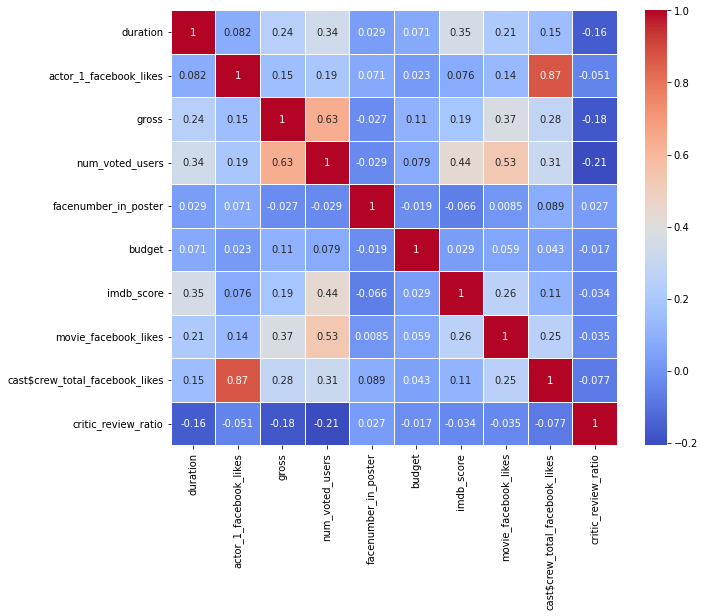

In [45]:
#Plotting the Correlation between the numerical values of the Dataset
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), linewidths=.6, cmap='coolwarm', annot=True, ax=ax)

In [46]:
df.head()

,duration,actor_1_facebook_likes,gross,genres,num_voted_users,facenumber_in_poster,content_rating,budget,imdb_score,movie_facebook_likes,cast$crew_total_facebook_likes,critic_review_ratio
0,178.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,0.0,PG-13,237000000.0,7.9,33000,6625.0,0.236739
1,169.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,0.0,PG-13,300000000.0,7.1,0,54913.0,0.243942
2,148.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,1.0,PG-13,245000000.0,6.8,85000,12254.0,0.605634
3,164.0,27000.0,448130642.0,Action|Thriller,1144337,0.0,PG-13,250000000.0,8.5,164000,174759.0,0.301000
5,132.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1.0,PG-13,263700000.0,6.6,24000,3510.0,0.626016


In [47]:
df.describe()

,duration,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,imdb_score,movie_facebook_likes,cast$crew_total_facebook_likes,critic_review_ratio
count,4695.000000,4695.000000,4.695000e+03,4.695000e+03,4695.000000,4.695000e+03,4695.000000,4695.000000,4695.000000,4695.000000
mean,108.644941,6828.262833,4.579718e+07,8.792591e+04,1.358679,3.936575e+07,6.431353,7792.492865,13183.841108,0.889734
std,22.546393,14992.885315,6.384423e+07,1.408106e+05,2.009775,2.028047e+08,1.098504,19625.770645,22608.899488,1.007769
min,14.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,2.180000e+02,1.600000,0.000000,0.000000,0.037037
25%,94.000000,638.000000,8.026422e+06,1.085750e+04,0.000000,8.000000e+06,5.800000,0.000000,2231.000000,0.383346
50%,104.000000,1000.000000,2.594677e+07,3.819100e+04,1.000000,2.000000e+07,6.600000,180.000000,4728.000000,0.622047
75%,118.000000,11000.000000,5.428985e+07,1.020970e+05,2.000000,4.000000e+07,7.200000,5000.000000,16756.500000,1.090909
max,330.000000,640000.000000,7.605058e+08,1.689764e+06,43.000000,1.221550e+10,9.300000,349000.000000,672015.000000,25.000000


In [48]:
df1=df.copy()

In [49]:
df2=df.copy()
df2.head(2)

,duration,actor_1_facebook_likes,gross,genres,num_voted_users,facenumber_in_poster,content_rating,budget,imdb_score,movie_facebook_likes,cast$crew_total_facebook_likes,critic_review_ratio
0,178.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,0.0,PG-13,237000000.0,7.9,33000,6625.0,0.236739
1,169.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,0.0,PG-13,300000000.0,7.1,0,54913.0,0.243942


In [50]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['genres','content_rating']
df1[cat_list]=df1[cat_list].apply(lambda x:le.fit_transform(x))

In [52]:
#A sample of data after label encoding
df1.head()

,duration,actor_1_facebook_likes,gross,genres,num_voted_users,facenumber_in_poster,content_rating,budget,imdb_score,movie_facebook_likes,cast$crew_total_facebook_likes,critic_review_ratio
0,178.0,1000.0,760505847.0,101,886204,0.0,7,237000000.0,7.9,33000,6625.0,0.236739
1,169.0,40000.0,309404152.0,95,471220,0.0,7,300000000.0,7.1,0,54913.0,0.243942
2,148.0,11000.0,200074175.0,121,275868,1.0,7,245000000.0,6.8,85000,12254.0,0.605634
3,164.0,27000.0,448130642.0,278,1144337,0.0,7,250000000.0,8.5,164000,174759.0,0.301000
5,132.0,640.0,73058679.0,119,212204,1.0,7,263700000.0,6.6,24000,3510.0,0.626016


<AxesSubplot:>

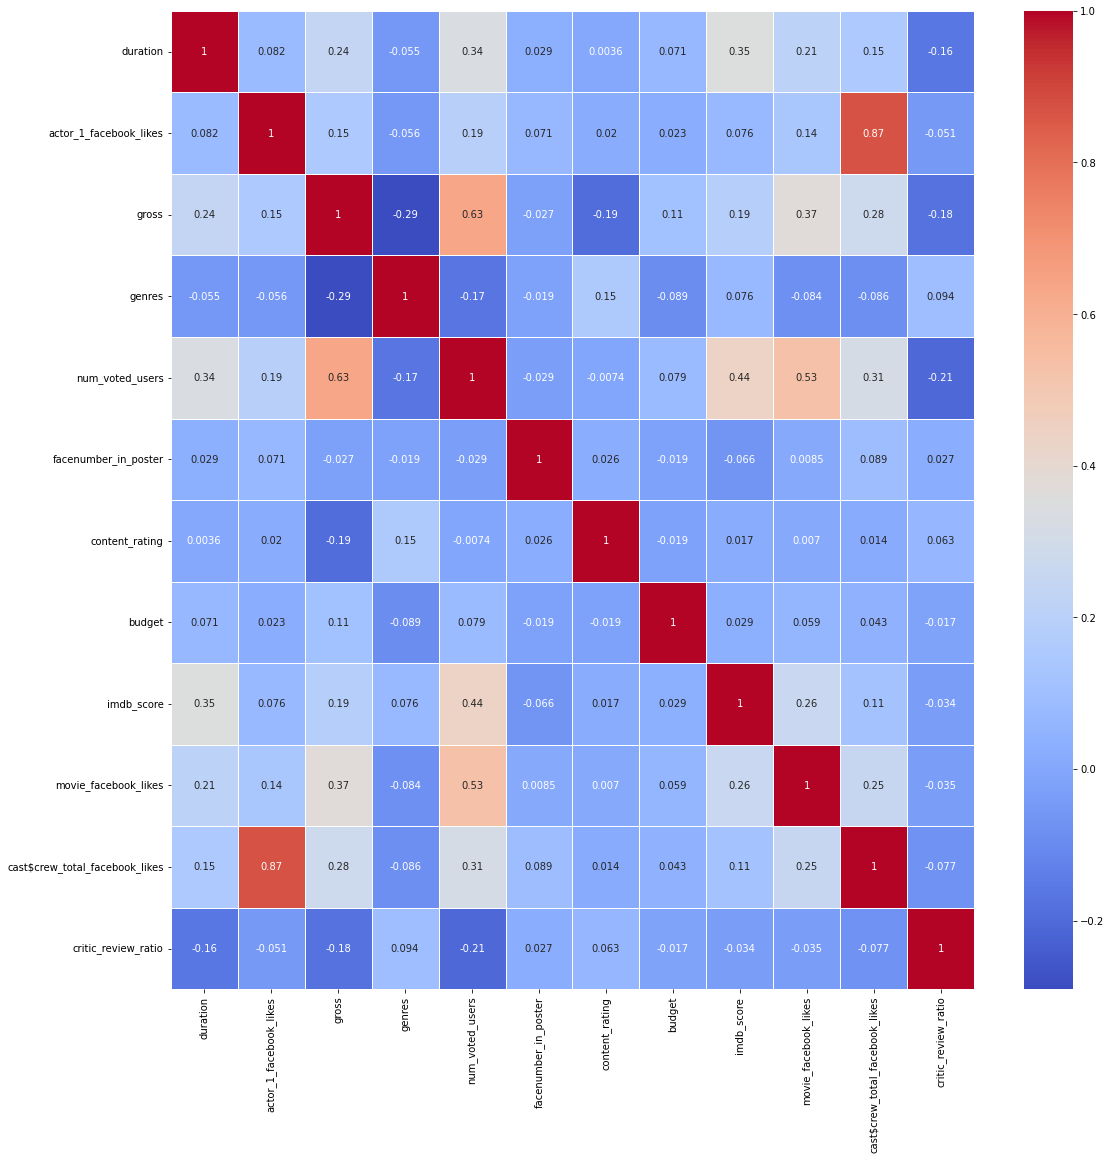

In [53]:
#Plotting the Correlation between the numerical values of the Dataset
_, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df1.corr(), linewidths=.6, cmap='coolwarm', annot=True, ax=ax)

In [54]:
# split the dataset into dependent(X) and Independent(Y) datasets
X=df1.drop(['imdb_score'],axis=1)
y = df1['imdb_score']

In [55]:
# spliting the data into trainning and test dateset
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
# feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [57]:
#Linear Regressor
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.9103521682872727


In [59]:
from sklearn.metrics import r2_score as r2
print(r2(y_test,predictions))

0.2839684436477252


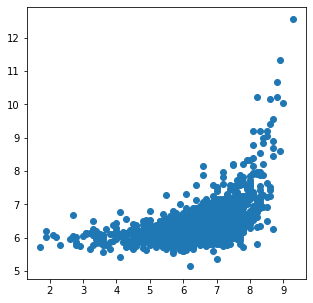

In [60]:
#Visualization of test and prediction data
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions)

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 500)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)

In [62]:
mean_squared_error(rf_pred, y_test)

0.7502603529879346

In [63]:
df2=df.copy()

In [64]:
df2.head()

,duration,actor_1_facebook_likes,gross,genres,num_voted_users,facenumber_in_poster,content_rating,budget,imdb_score,movie_facebook_likes,cast$crew_total_facebook_likes,critic_review_ratio
0,178.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,0.0,PG-13,237000000.0,7.9,33000,6625.0,0.236739
1,169.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,0.0,PG-13,300000000.0,7.1,0,54913.0,0.243942
2,148.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,1.0,PG-13,245000000.0,6.8,85000,12254.0,0.605634
3,164.0,27000.0,448130642.0,Action|Thriller,1144337,0.0,PG-13,250000000.0,8.5,164000,174759.0,0.301000
5,132.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1.0,PG-13,263700000.0,6.6,24000,3510.0,0.626016


In [65]:
df2.describe()

,duration,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,imdb_score,movie_facebook_likes,cast$crew_total_facebook_likes,critic_review_ratio
count,4695.000000,4695.000000,4.695000e+03,4.695000e+03,4695.000000,4.695000e+03,4695.000000,4695.000000,4695.000000,4695.000000
mean,108.644941,6828.262833,4.579718e+07,8.792591e+04,1.358679,3.936575e+07,6.431353,7792.492865,13183.841108,0.889734
std,22.546393,14992.885315,6.384423e+07,1.408106e+05,2.009775,2.028047e+08,1.098504,19625.770645,22608.899488,1.007769
min,14.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,2.180000e+02,1.600000,0.000000,0.000000,0.037037
25%,94.000000,638.000000,8.026422e+06,1.085750e+04,0.000000,8.000000e+06,5.800000,0.000000,2231.000000,0.383346
50%,104.000000,1000.000000,2.594677e+07,3.819100e+04,1.000000,2.000000e+07,6.600000,180.000000,4728.000000,0.622047
75%,118.000000,11000.000000,5.428985e+07,1.020970e+05,2.000000,4.000000e+07,7.200000,5000.000000,16756.500000,1.090909
max,330.000000,640000.000000,7.605058e+08,1.689764e+06,43.000000,1.221550e+10,9.300000,349000.000000,672015.000000,25.000000


Transforming the right skwed features into logarithmic scale

In [66]:
df2['budget'] = np.log(df2['budget'])

In [67]:
df2['gross'] = np.log(df2['gross'])

In [68]:
df2['num_voted_users'] = np.log(df2['num_voted_users'])

In [69]:
df2.genres.unique(), df2.genres.nunique()

(array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
        'Action|Adventure|Thriller', 'Action|Thriller',
        'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
        'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
        'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
        'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
        'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
        'Adventure|Fantasy', 'Action|Adventure|Drama|History',
        'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
        'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
        'Action|Adventure|Fantasy|Romance',
        'Action|Adventure|Fantasy|Sci-Fi|Thriller',
        'Adventure|Animation|Comedy|Family|Fantasy',
        'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
        'Action|Adventure|Horror|Sci-Fi|Thriller',
        'Adventure|Animation|Family|Sci-Fi',
        'Action|Comedy|Crime|Thril

In [70]:
df2['main_genre'] = df2['genres'].str.split('|').str[0]

In [71]:
df2.main_genre.unique()

array(['Action', 'Adventure', 'Drama', 'Animation', 'Comedy', 'Mystery',
       'Crime', 'Biography', 'Fantasy', 'Documentary', 'Sci-Fi', 'Horror',
       'Romance', 'Thriller', 'Family', 'Music', 'Western', 'Musical',
       'Film-Noir'], dtype=object)

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['main_genre'] = le.fit_transform(df2.main_genre)

In [73]:
df2.drop('genres',axis=1,inplace=True)

In [74]:
df2.head(2)

,duration,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,imdb_score,movie_facebook_likes,cast$crew_total_facebook_likes,critic_review_ratio,main_genre
0,178.0,1000.0,20.449494,13.694702,0.0,PG-13,19.283571,7.9,33000,6625.0,0.236739,0
1,169.0,40000.0,19.550159,13.063080,0.0,PG-13,19.519293,7.1,0,54913.0,0.243942,0


In [75]:
le1 = LabelEncoder()
df2['content_rating'] = le1.fit_transform(df2.content_rating)

In [76]:
df2.head(2)

,duration,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,imdb_score,movie_facebook_likes,cast$crew_total_facebook_likes,critic_review_ratio,main_genre
0,178.0,1000.0,20.449494,13.694702,0.0,7,19.283571,7.9,33000,6625.0,0.236739,0
1,169.0,40000.0,19.550159,13.063080,0.0,7,19.519293,7.1,0,54913.0,0.243942,0


In [77]:
df2.columns

Index(['duration', 'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'facenumber_in_poster', 'content_rating', 'budget', 'imdb_score',
       'movie_facebook_likes', 'cast$crew_total_facebook_likes',
       'critic_review_ratio', 'main_genre'],
      dtype='object')

In [78]:
df2.describe()

,duration,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,imdb_score,movie_facebook_likes,cast$crew_total_facebook_likes,critic_review_ratio,main_genre
count,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000
mean,108.644941,6828.262833,16.529689,10.301123,1.358679,7.626198,16.551291,6.431353,7792.492865,13183.841108,0.889734,3.933120
std,22.546393,14992.885315,2.107065,1.750125,2.009775,1.950985,1.571256,1.098504,19625.770645,22608.899488,1.007769,3.347028
min,14.000000,0.000000,5.087596,1.609438,0.000000,0.000000,5.384495,1.600000,0.000000,0.000000,0.037037,0.000000
25%,94.000000,638.000000,15.898249,9.292609,0.000000,7.000000,15.894952,5.800000,0.000000,2231.000000,0.383346,1.000000
50%,104.000000,1000.000000,17.071558,10.550355,1.000000,7.000000,16.811243,6.600000,180.000000,4728.000000,0.622047,4.000000
75%,118.000000,11000.000000,17.809848,11.533679,2.000000,9.000000,17.504390,7.200000,5000.000000,16756.500000,1.090909,7.000000
max,330.000000,640000.000000,20.449494,14.340099,43.000000,14.000000,23.225971,9.300000,349000.000000,672015.000000,25.000000,18.000000


In [79]:
# split the dataset into dependent(X) and Independent(Y) datasets
X=df2.drop(['imdb_score'],axis=1)
y = df2['imdb_score']

In [80]:
# spliting the data into trainning and test dateset
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [81]:
#Linear Regressor
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.790867130152061


In [83]:
from sklearn.metrics import r2_score as r2
print(r2(y_test,predictions))

0.37794862054753864


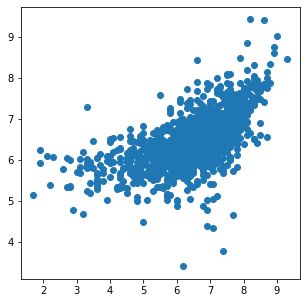

In [84]:
#Visualization of test and prediction data
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions)

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 500)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)

In [86]:
mean_squared_error(rf_pred, y_test)

0.6058158260610365

In [114]:
from sklearn.metrics import r2_score as r2
print(r2(rf_pred, y_test))

-0.021542773128799375


# Hyperparameter tuning with random forest regressor

In [87]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [88]:
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500}

In [89]:
y_grid_pred_rf = grid_search_rf.predict(X_test)
mean_squared_error(y_grid_pred_rf, y_test.values)

0.6022490801470208

# XGBoost with Hyperparameter tuning

In [90]:
!pip3 install xgboost

In [91]:
import xgboost as xgb
xg_model = xgb.XGBRegressor(n_estimators = 500)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [92]:
results = xg_model.predict(X_test)

In [93]:
xg_model.score(X_train, y_train)

0.9999172719560792

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test, results)

0.4862118383915689

In [95]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,results))

MSE is: 0.6532228402660694


In [96]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 4],
    'learning_rate' : [0.1, 0.01, 0.05],
    'n_estimators' : [100, 500, 1000]
}
# Create a based model
model_xgb= xgb.XGBRegressor()
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = model_xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [97]:
grid_search_xgb.fit(X_train, y_train)
grid_search_xgb.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [98]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [99]:
mean_squared_error(y_test.values, y_pred_xgb)

0.5796552758198195

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_xgb)

0.5440759260518421

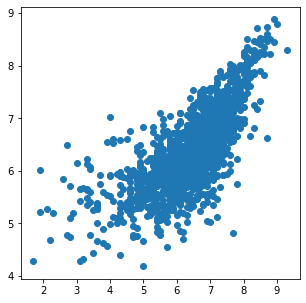

In [101]:
#Visualization of test and prediction data
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred_xgb)

# Gradient Boosting Regressor with hyper parameter tuning

In [102]:
from sklearn import ensemble
n_trees=200
gradientboost = ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
gradientboost.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, loss='ls', max_depth=4,
                          n_estimators=200)

In [103]:
y_pred_gb=gradientboost.predict(X_test)
error=gradientboost.loss_(y_test,y_pred_gb) ##Loss function== Mean square error
print("MSE:%.3f" % error)

MSE:0.602


Hyperparameter tuning of gradient boosting regressor

In [104]:
y_pred_gb.min(), y_pred_gb.max()

(4.394895571511272, 8.89095680179554)

In [105]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'loss' : ['ls'],
    'max_depth' : [3, 4, 5],
    'learning_rate' : [0.01, 0.001],
    'n_estimators': [100, 200, 500]
}
# Create a based model
gb = ensemble.GradientBoostingRegressor()
# Instantiate the grid search model
grid_search_gb = GridSearchCV(estimator = gb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [106]:
grid_search_gb.fit(X_train, y_train)
grid_search_gb.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 5, 'n_estimators': 500}

In [107]:
grid_search_gb_pred = grid_search_gb.predict(X_test)

In [108]:
mean_squared_error(y_test.values, grid_search_gb_pred)

0.6009352717963518

# Conclusion

Linear Regressor:           MSE- 0.79 ,  r2 - 0.37
Random Forest Regressor:    MSE- 0.61 ,  r2 -
XGBoost Regressor:          MSE- 0.65 ,  r2 -0.48
Gradient Boost Regressor:   MSE- 0.60 ,  r2 -

After Hyper parameter tuning
Random Forest Regressor:    MSE- 0.60 ,  
XGBoost Regressor:          MSE- 0.57 ,  r2=.54
Gradient Boost Regressor:   MSE- 0.60 ,

So after hyper parameter tuning XGBoost regressor shows less error . So we can consider XGBoost as the final model

# Interpreting Results of Regression Model
Considering XG Boost as a final model with very less error rate.

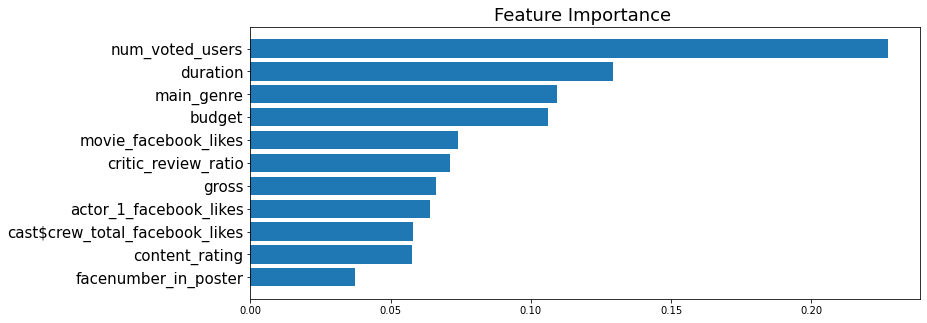

In [109]:
feature_importance = grid_search_xgb.best_estimator_.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos = np.arange(len(sorted_importance))
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X_train.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()


# Exporting the data

In [ ]:
model_xgb= xgb.XGBRegressor()
model.fit((X_train, y_train))
grid_search_xgb = GridSearchCV(estimator = model_xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_xgb.fit(X_train, y_train)
y_pred_xgb = grid_search_xgb.predict(X_test)
r2_score(y_test, y_pred_xgb)


In [113]:
model= xgb.XGBRegressor(n_estimators = 500)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2_score(y_test, predictions)
print('MSE is:',mean_squared_error(y_test,predictions))
print('Score is:',r2_score(y_test, predictions))

MSE is: 0.6532228402660694
Score is: 0.4862118383915689


In [111]:
#Exporting
import pickle

pickle.dump(model,open('model.pkl','wb'))

In [112]:
#Confirming
model=pickle.load(open('model.pkl', 'rb'))
result_score=r2_score(y_test, results)
print ('Score is:',result_score)

Score is: 0.4862118383915689
